In [15]:
import numpy as np
import matplotlib.pyplot as plt
import time

In [16]:
# Generating synthetic data
def generate_data(num_samples):
    np.random.seed(42)
    X = np.random.rand(num_samples, 1) * 10 # Features
    y = 3 * X + 7 + np.random.randn(num_samples, 1) # Target with some noise
    return X, y

In [17]:
# Mean squared error (loss function)
def compute_loss(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

In [18]:
# Batch gradient descent (normal GD)
def batch_gradient_descent(X, y, epochs, lr=0.01):
    m, n = X.shape
    X = np.c_[np.ones((m, 1)), X]   # Add bias term
    theta = np.random.randn(n + 1, 1)
    losses = []
    
    for epoch in range(epochs):
        predictions = X.dot(theta)
        errors = predictions - y
        gradients = 2 / m * X.T.dot(errors)
        theta -= lr * gradients
        loss = compute_loss(y, predictions)
        losses.append(loss)
    
    return theta, losses

In [19]:
# Stochastic gradient descent
def stochastic_gradient_descent(X, y, epochs, lr=0.01):
    m, n = X.shape
    X = np.c_[np.ones((m, 1)), X]   # Add bias term
    theta = np.random.randn(n + 1, 1)
    losses = []
    
    for epoch in range(epochs):
        random_index = np.random.randint(m)
        xi = X[random_index:random_index + 1]
        yi = y[random_index:random_index + 1]
        predictions = xi.dot(theta)
        errors = predictions - yi
        gradients = 2 * xi.T.dot(errors)
        theta -= lr * gradients
        loss = compute_loss(yi, predictions)
        losses.append(loss)
    
    return theta, losses

In [20]:
# Comparison on small and large datasets
small_dataset_size = 1000
large_dataset_size = 100000000

X_small, y_small = generate_data(small_dataset_size)
X_large, y_large = generate_data(large_dataset_size)

In [21]:
# Running BGD for small dataset
start_time = time.time()
theta_bgd_small, losses_bgd_small = batch_gradient_descent(X_small, y_small, epochs=50)
time_bgd_small = time.time() - start_time

# Running BGD for large dataset
start_time = time.time()
theta_bgd_large, losses_bgd_large = batch_gradient_descent(X_large, y_large, epochs=50)
time_bgd_large = time.time() - start_time

In [22]:
# Running SGD for small dataset
start_time = time.time()
theta_sgd_small, losses_sgd_small = stochastic_gradient_descent(X_small, y_small, epochs=50)
time_sgd_small = time.time() - start_time

# Running SGD for large dataset
start_time = time.time()
theta_sgd_large, losses_sgd_large = stochastic_gradient_descent(X_large, y_large, epochs=50)
time_sgd_large = time.time() - start_time

In [23]:
# Printing the results 
print(f"BGD (small dataset): Time = {time_bgd_small:.4f}s, Final loss = {losses_bgd_small[-1]:.4f}")
print(f"BGD (large dataset): Time = {time_bgd_large:.4f}s, Final loss = {losses_bgd_large[-1]:.4f}")
print(f"SGD (small dataset): Time = {time_sgd_small:.4f}s, Final loss = {losses_sgd_small[-1]:.4f}")
print(f"SGD (large dataset): Time = {time_sgd_large:.4f}s, Final loss = {losses_sgd_large[-1]:.4f}")

BGD (small dataset): Time = 0.0010s, Final loss = 6.4281
BGD (large dataset): Time = 84.1411s, Final loss = 12.3086
SGD (small dataset): Time = 0.0045s, Final loss = 10.5045
SGD (large dataset): Time = 0.9697s, Final loss = 0.0266


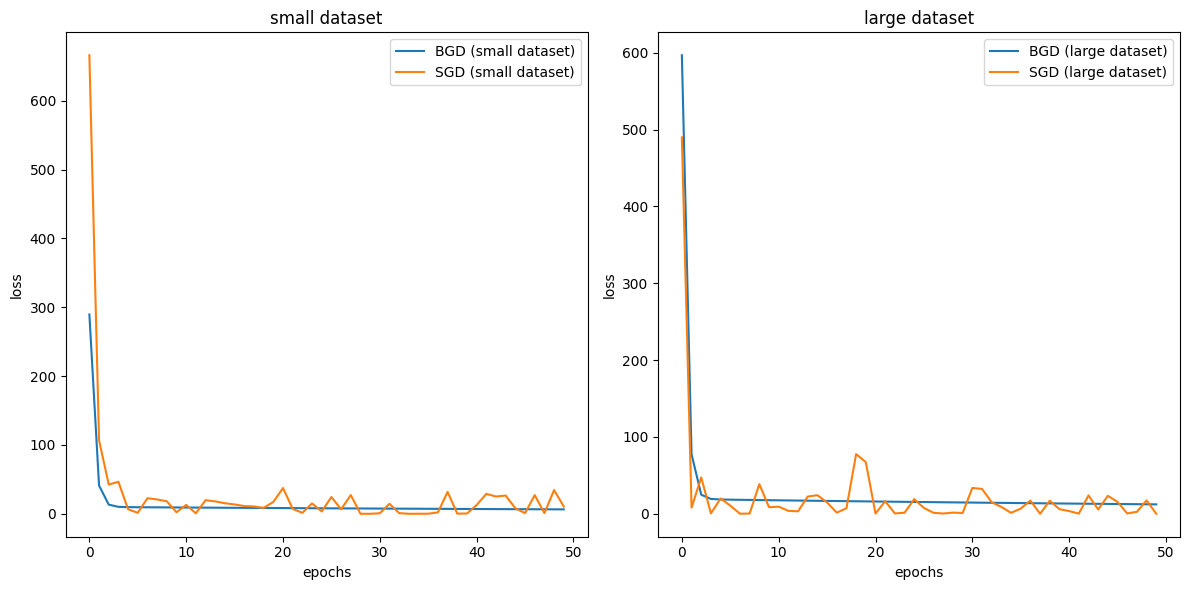

In [24]:
# Plot losses
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(losses_bgd_small, label="BGD (small dataset)")
plt.plot(losses_sgd_small, label="SGD (small dataset)")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.title("small dataset")

plt.subplot(1, 2, 2)
plt.plot(losses_bgd_large, label="BGD (large dataset)")
plt.plot(losses_sgd_large, label="SGD (large dataset)")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.title("large dataset")

plt.tight_layout()
plt.show()